In [1]:
#analysis of returns of major banks in India with data obtained from yahoo finance
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
                   

In [2]:
import pandas as pd
from pandas_datareader import data

symbol = 'HDFCBANK.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfhdfc = data.DataReader(symbol, data_source, start_date, end_date)



In [3]:
symbol = 'SBIN.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfsbi = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
symbol = 'ICICIBANK.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dficici = data.DataReader(symbol, data_source, start_date, end_date)

In [5]:
symbol = 'AXISBANK.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfaxis = data.DataReader(symbol, data_source, start_date, end_date)

In [6]:
symbol = 'KOTAKBANK.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfkotak = data.DataReader(symbol, data_source, start_date, end_date)

In [7]:
symbol = 'INDUSINDBK.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfindus = data.DataReader(symbol, data_source, start_date, end_date)

In [8]:
df = pd.concat([dfsbi,dfhdfc,dficici,dfaxis,dfkotak,dfindus],keys=['SBI','HDFCBANK','ICICI','AXIS','KOTAK','INDUS'],names=['BankName','Date'])
df.head()

High         Low        Open       Close  \
BankName Date                                                         
SBI      2009-01-02  135.000000  131.220001  131.500000  133.184998   
         2009-01-05  137.764999  134.800003  135.399994  136.080002   
         2009-01-06  138.869995  129.800003  138.869995  132.285004   
         2009-01-07  134.964996  122.010002  132.500000  124.004997   
         2009-01-09  125.169998  117.635002  122.000000  122.110001   

                         Volume  Adj Close  
BankName Date                               
SBI      2009-01-02  24161650.0  46.174397  
         2009-01-05  26931910.0  47.178066  
         2009-01-06  35970960.0  45.862366  
         2009-01-07  37268580.0  42.991741  
         2009-01-09  24996510.0  42.334759

In [9]:

##df.loc[(['SBI','HDFC','ICICI','AXIS'],['2009-01-02','2020-04-09']),['Close','Volume']]
df1 = df.reset_index( drop=False)

df1.head()

,BankName,Date,High,Low,Open,Close,Volume,Adj Close
0,SBI,2009-01-02,135.000000,131.220001,131.500000,133.184998,24161650.0,46.174397
1,SBI,2009-01-05,137.764999,134.800003,135.399994,136.080002,26931910.0,47.178066
2,SBI,2009-01-06,138.869995,129.800003,138.869995,132.285004,35970960.0,45.862366
3,SBI,2009-01-07,134.964996,122.010002,132.500000,124.004997,37268580.0,42.991741
4,SBI,2009-01-09,125.169998,117.635002,122.000000,122.110001,24996510.0,42.334759


c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



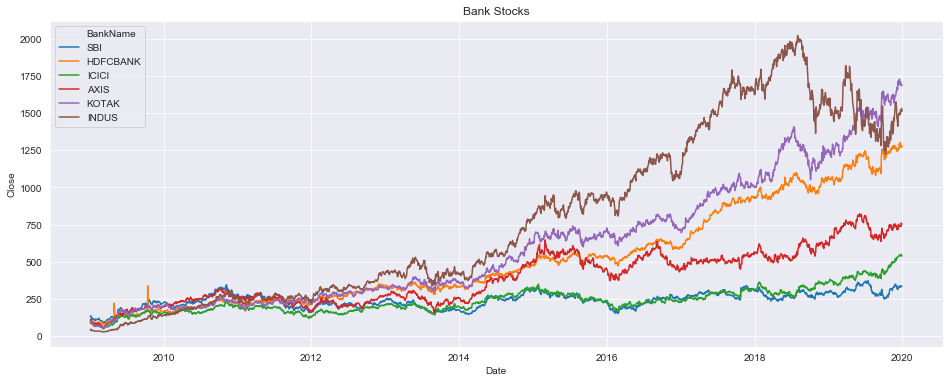

In [10]:
# this is for seaborn plots. 

import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
bankplot=sns.lineplot(x='Date',y='Close',hue='BankName', data=df1 )
bankplot.set_title('Bank Stocks')
bankplot


In [11]:
#this is for plotly plots

df1.iplot(kind='spread',x='Date',y='Close',categories='BankName',mode='lines')

In [12]:
yearlist=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['BankName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['BankName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['BankName','Date'],inplace=True)
return_pct_change=pd.DataFrame()
for k in  companylist:
    return_pct_change = pd.concat([return_pct_change,returns.loc[k].pct_change()],axis=1)
    return_pct_change.rename(columns={'Price':k},inplace=True)
    
return_pct_change.to_excel('Bank_Returns.xlsx','Bank')


    



In [13]:
yearlist=[2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['BankName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['BankName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['BankName','Date'],inplace=True)
return_pct_change_absolute=pd.DataFrame()
for k in  companylist:
    return_pct_change_absolute = pd.concat([return_pct_change_absolute,returns.loc[k].pct_change()],axis=1)
    return_pct_change_absolute.rename(columns={'Price':k},inplace=True)
    

return_pct_change_absolute.to_excel('Bank_Returns_absolute.xlsx','Bank')


    

